    Country:  2010 Total:  2011 Total:  2012 Total:  2013 Total:  2014 Total:  \
0        AFG     68.96605     66.94454     68.25744     72.18289     68.05715   
1        AGO     24.19840     24.67357     24.00830     24.53186     24.11941   
2        ALB     21.94870     22.99650     21.70175     19.77038     19.13142   
3        AND     11.42903     11.66004     10.79727     10.14877      9.34741   
4        ARE     43.70844     43.53498     43.93421     42.88311     41.33546   
..       ...          ...          ...          ...          ...          ...   
190      WSM      7.40466      7.48468      7.55718      7.63588      7.55472   
191      YEM     38.82749     41.02840     42.48632     41.02003     38.27183   
192      ZAF     18.69321     18.66777     18.67658     18.81701     18.97790   
193      ZMB     17.08674     17.33064     17.55181     17.24380     17.29111   
194      ZWE     13.27519     13.26777     13.20859     13.09511     13.12364   

     2015 Total:  2016 Tota

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


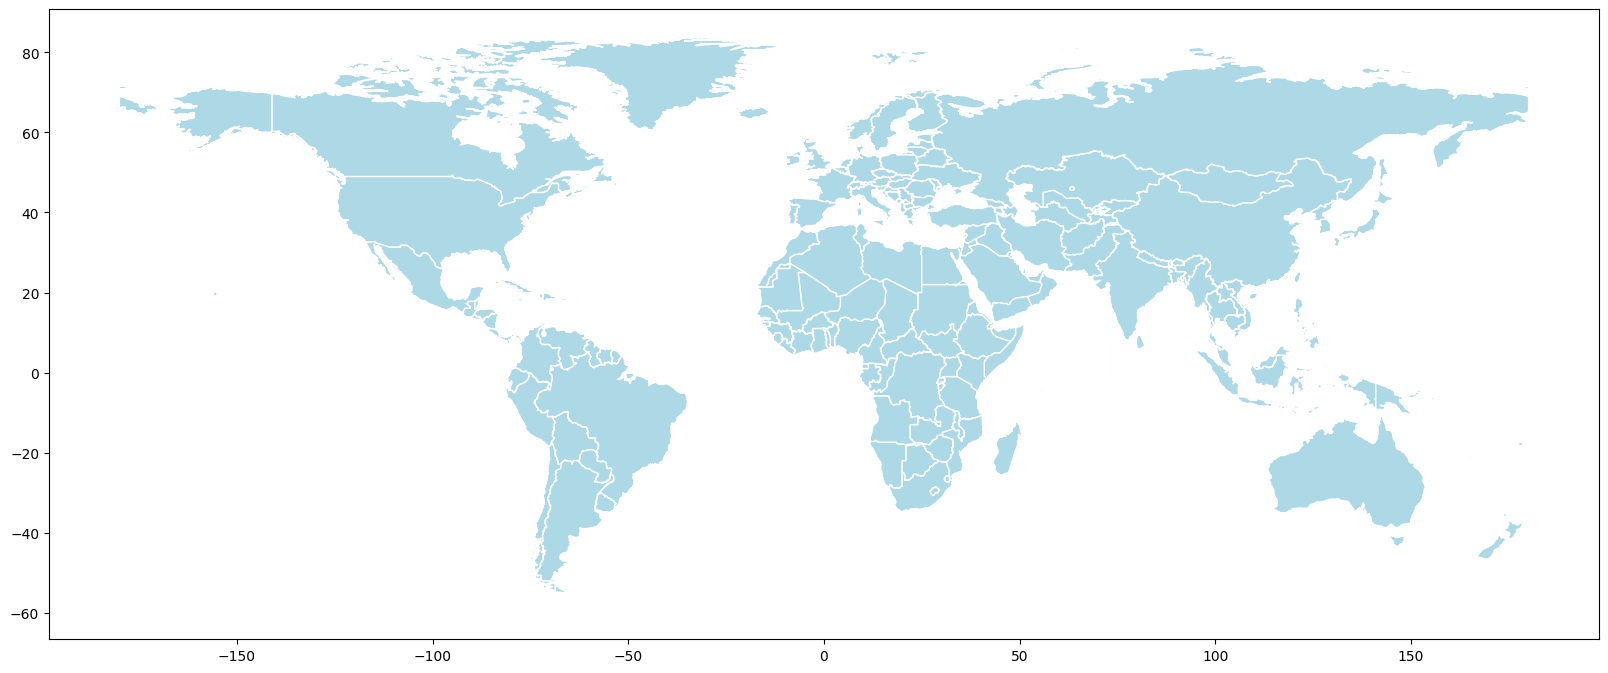

In [2]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import country_converter as coco
import matplotlib.pyplot as plt

rjson_2 = requests.get("https://ghoapi.azureedge.net/api/SDGPM25?$filter=Dim1%20eq%20%27TOTL%27").json()

def total_each_year():
    total_list_of_each_year = [[rjson_2["value"][(i * 10) + current_year]["NumericValue"]
                                for i in range(195)] for current_year in range(10)]
    return(total_list_of_each_year)
total_list_of_each_year = total_each_year()

def listing_countries():
    country_list = [(rjson_2["value"][i * 10]["SpatialDim"]) for i in range(195)]
    return(country_list)
country_list = listing_countries()

dict = {"Country:": country_list, "2010 Total:": total_list_of_each_year[0], "2011 Total:": total_list_of_each_year[1],
        "2012 Total:": total_list_of_each_year[2], "2013 Total:": total_list_of_each_year[3],
        "2014 Total:": total_list_of_each_year[4], "2015 Total:": total_list_of_each_year[5],
        "2016 Total:": total_list_of_each_year[6], "2017 Total:": total_list_of_each_year[7],
        "2018 Total:": total_list_of_each_year[8], "2019 Total:": total_list_of_each_year[9]}

pm_25_df = pd.DataFrame(dict)
print(pm_25_df)

# Read shapefile using Geopandas
geo_df = gpd.read_file('ne_10m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
print(geo_df.head(3))
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')
iso3_codes = geo_df['country'].to_list()
# Converting to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# Adding the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list
# Dropping countries we don't have codes for
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

In [3]:
merged_df = pd.merge(left=geo_df, right=pm_25_df, how='left', left_on='country_code', right_on='Country:')
merged_df = merged_df.dropna()
merged_df

,country,country_code,geometry,iso2_code,Country:,2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,IDN,20.59222,19.12046,20.27159,20.90741,18.87457,19.34402,20.77603,18.41187,18.46806,19.33980
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY,MYS,22.67492,21.03622,22.27061,23.17544,20.80653,21.43982,22.88744,20.37580,20.49619,21.52164
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL,CHL,22.25415,22.50082,22.00630,23.82929,23.14193,24.15233,23.74832,22.69373,21.46726,20.48648
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",BO,BOL,28.03159,25.82634,26.25930,26.52307,27.47979,26.50242,26.40407,24.17303,24.63357,25.23416
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",PE,PER,29.59087,28.47326,29.99227,30.46651,31.47109,30.28824,29.48786,27.75851,28.81163,29.06587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Federated States of Micronesia,FSM,"MULTIPOLYGON (((163.02605 5.34089, 163.03045 5...",FM,FSM,7.55417,7.35190,7.46286,7.64291,7.37491,7.65392,7.73425,7.61790,7.63087,7.78563
234,Vanuatu,VUT,"MULTIPOLYGON (((169.84034 -20.14080, 169.86052...",VU,VUT,8.08733,8.23360,8.19068,8.31014,8.35515,8.62408,8.66380,8.61743,8.80598,8.42148
235,Niue,NIU,"POLYGON ((-169.85114 -18.96510, -169.82531 -18...",NU,NIU,6.44213,6.34358,6.43149,6.40683,6.51817,6.52981,6.75023,6.64027,6.73490,6.74203
237,Palau,PLW,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",PW,PLW,7.22831,7.60687,7.77952,7.77074,7.75975,8.01579,7.58828,7.49994,7.77358,7.82424


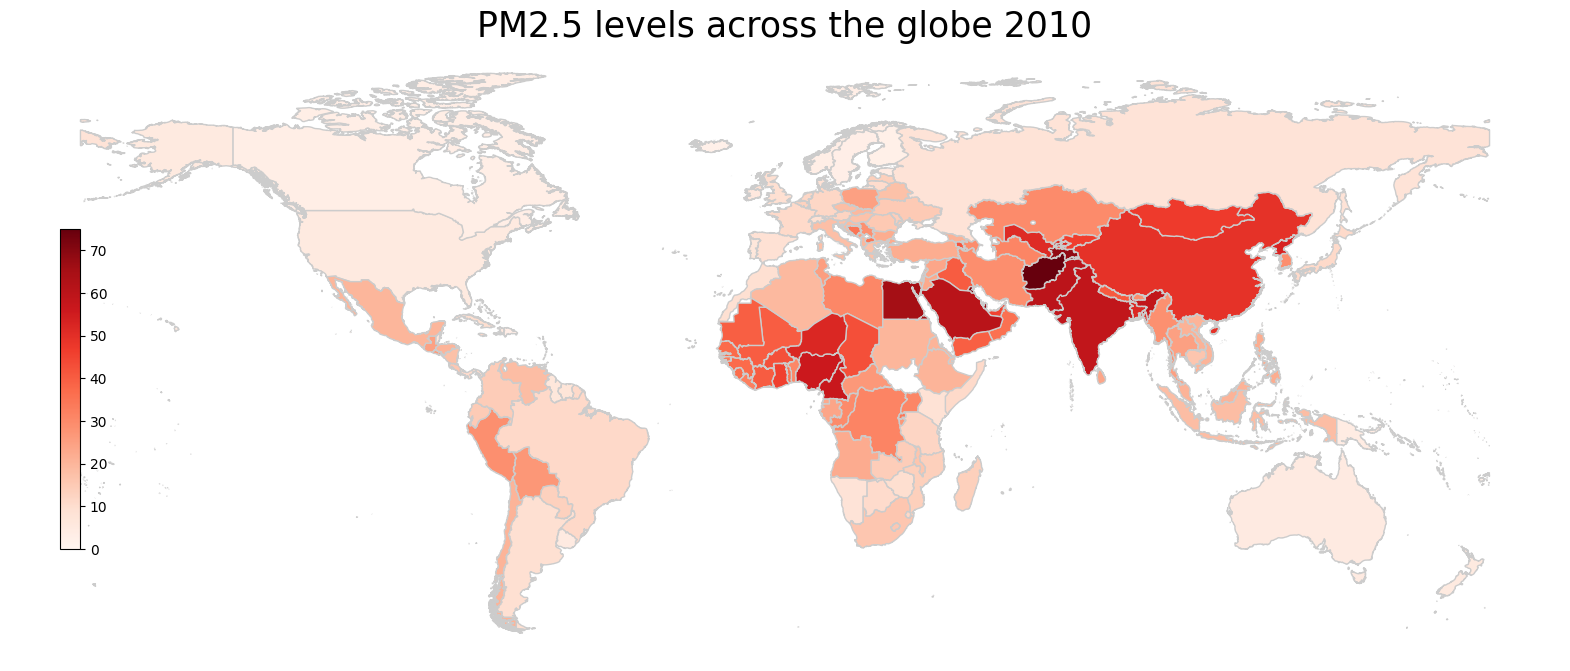

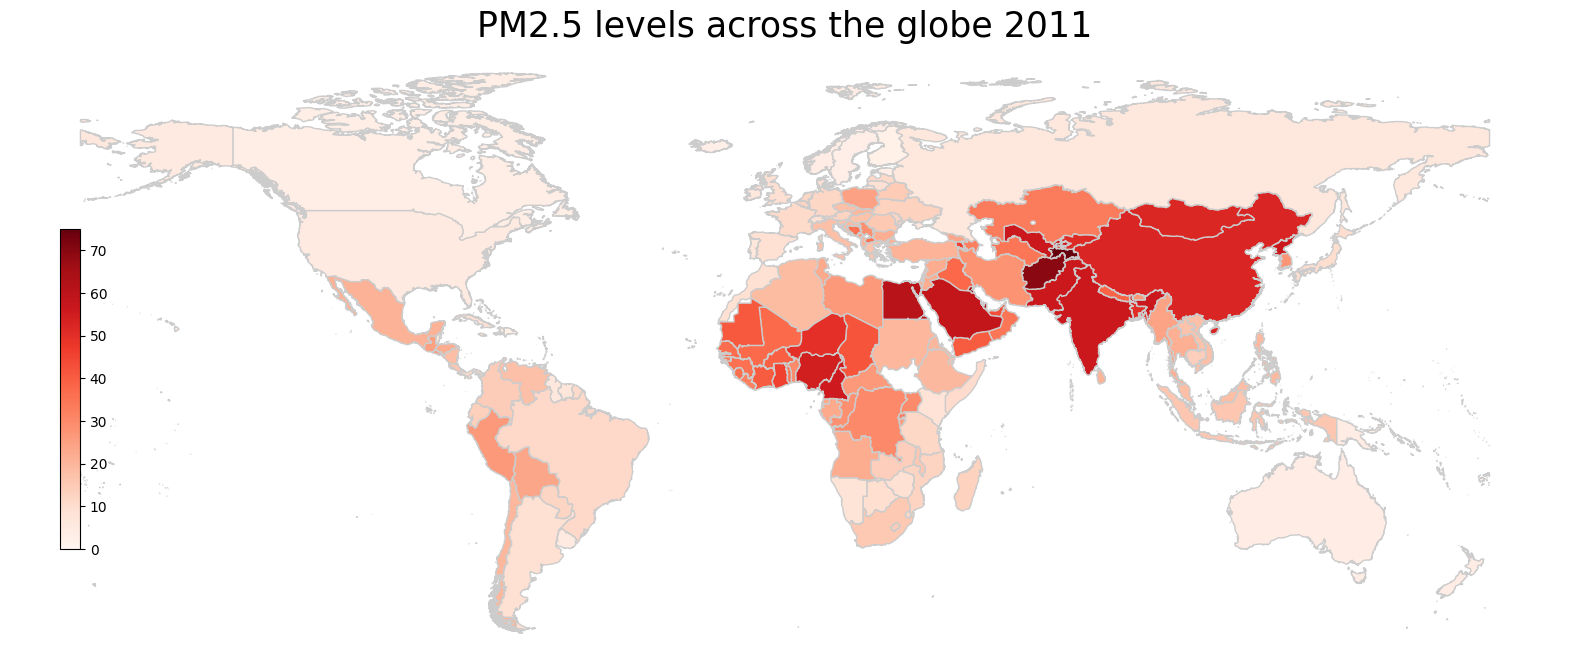

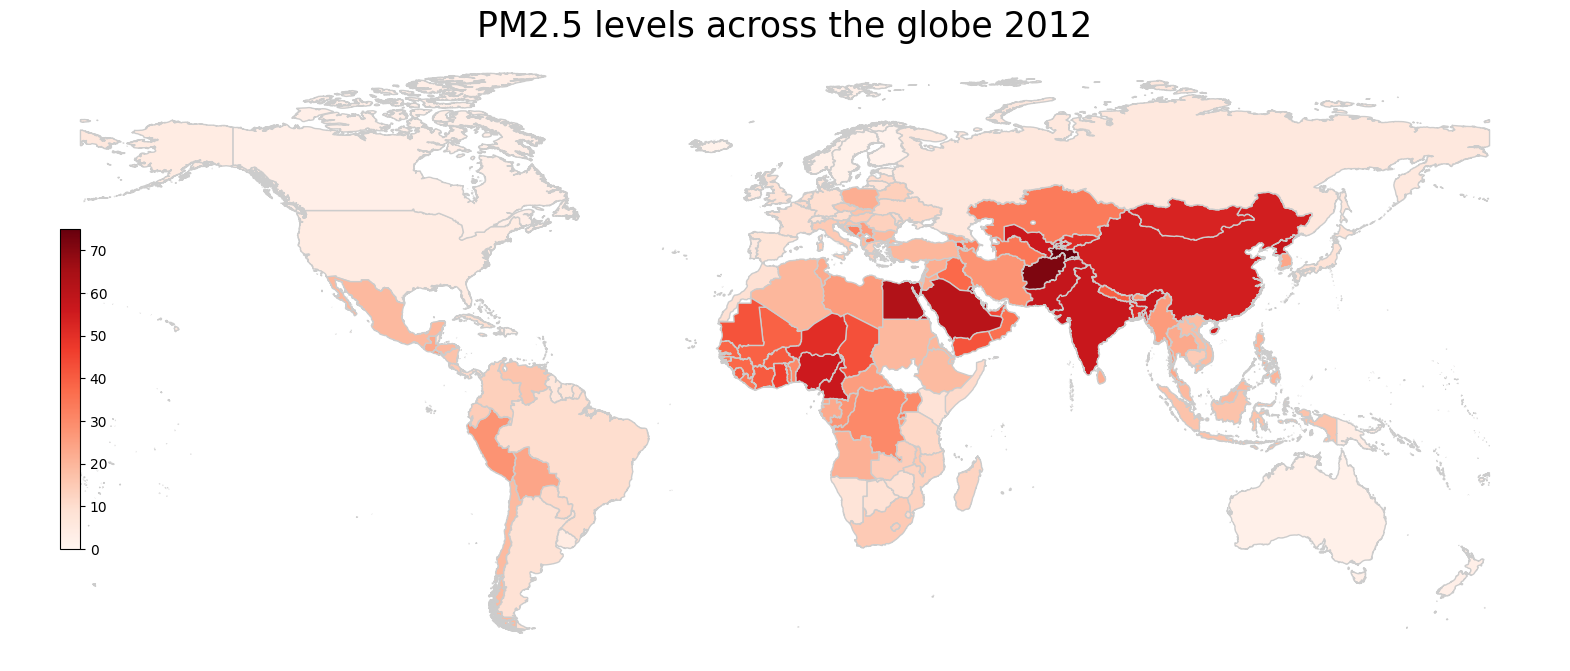

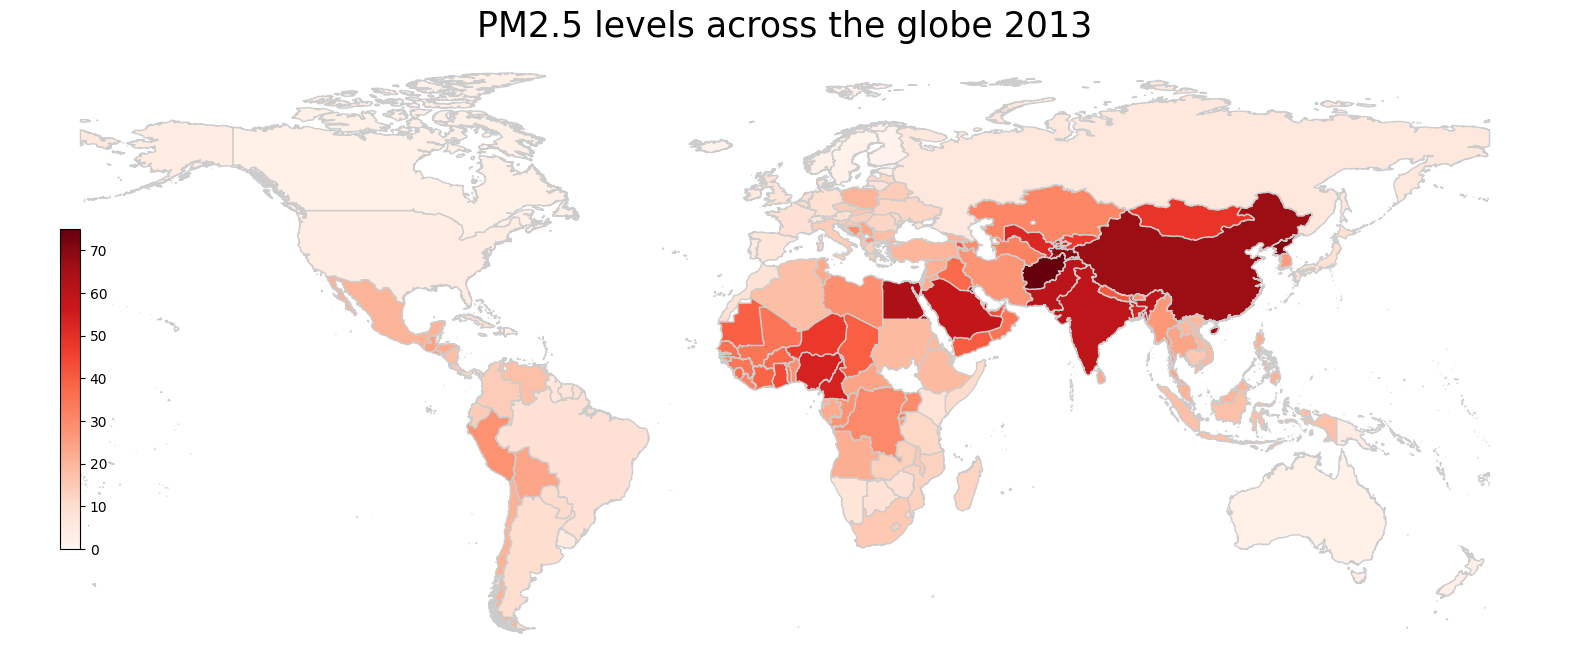

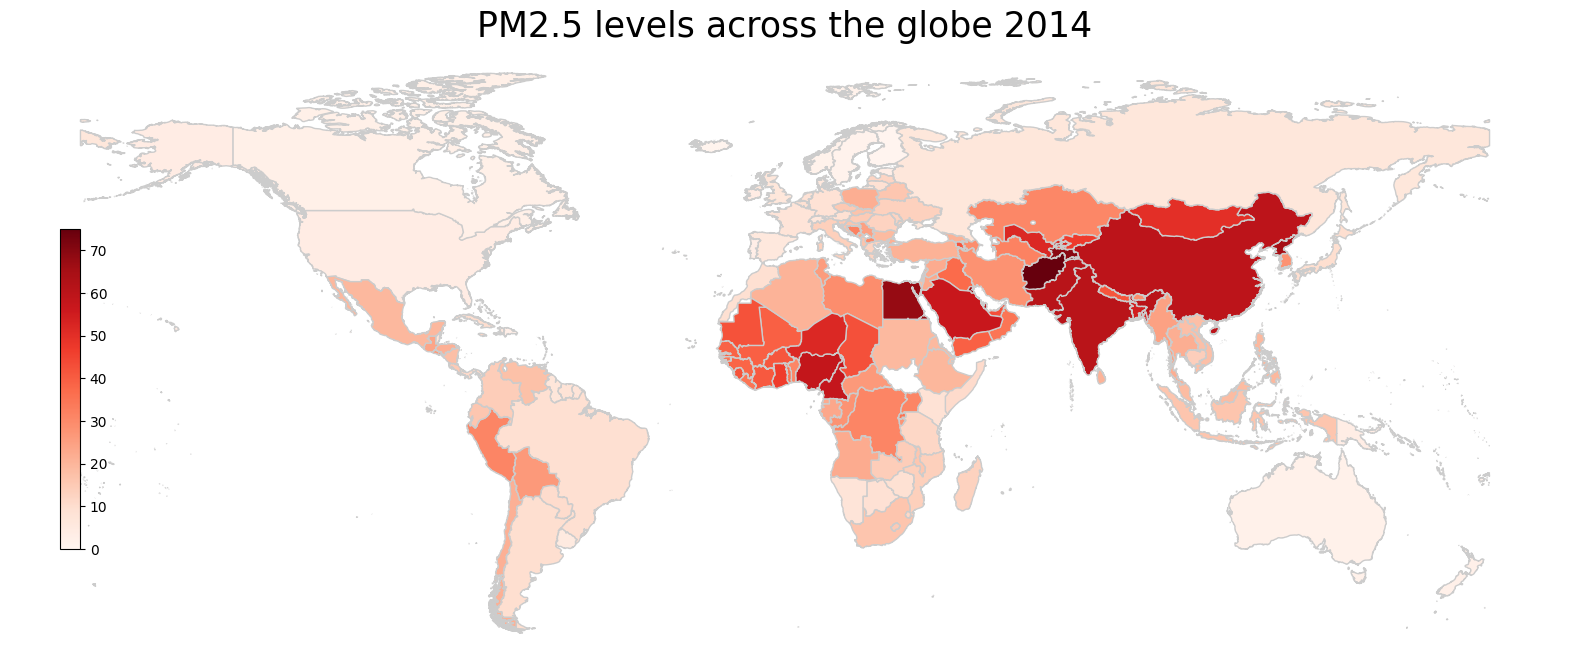

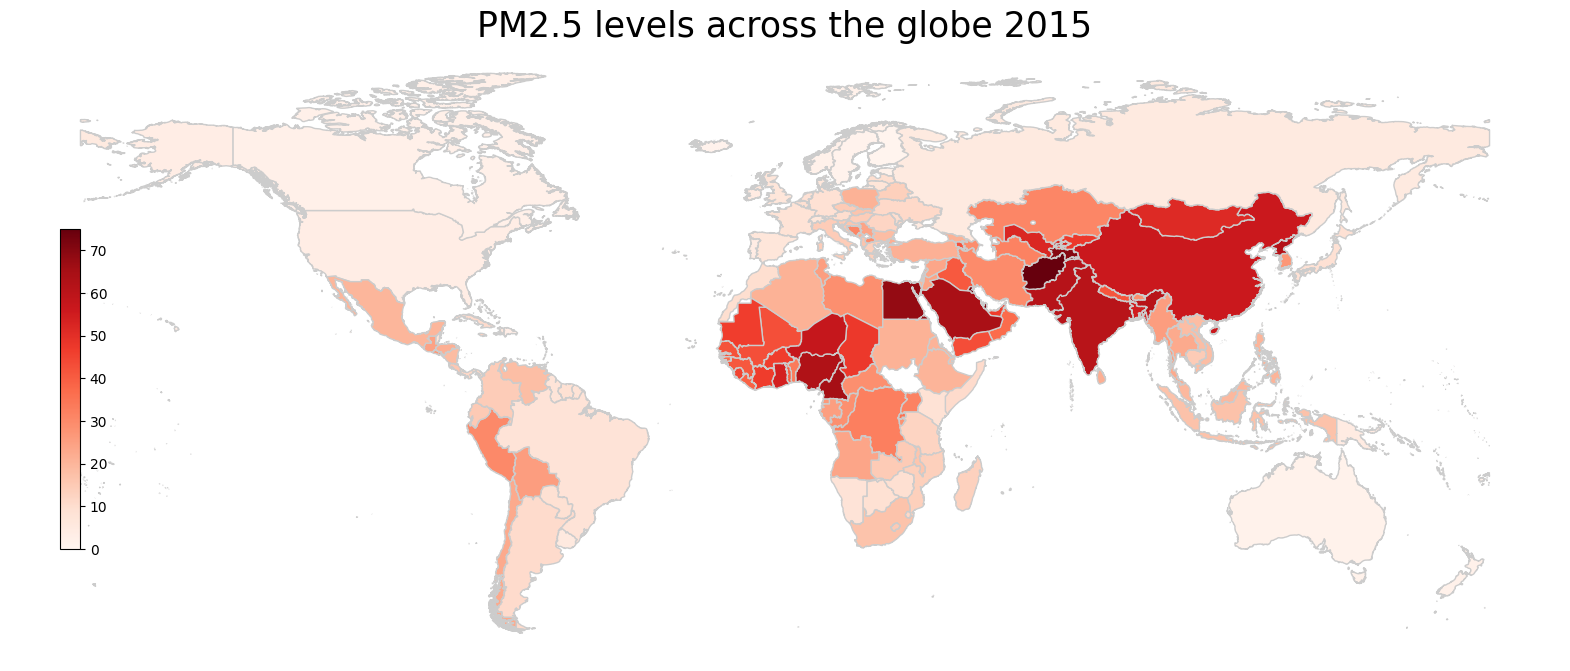

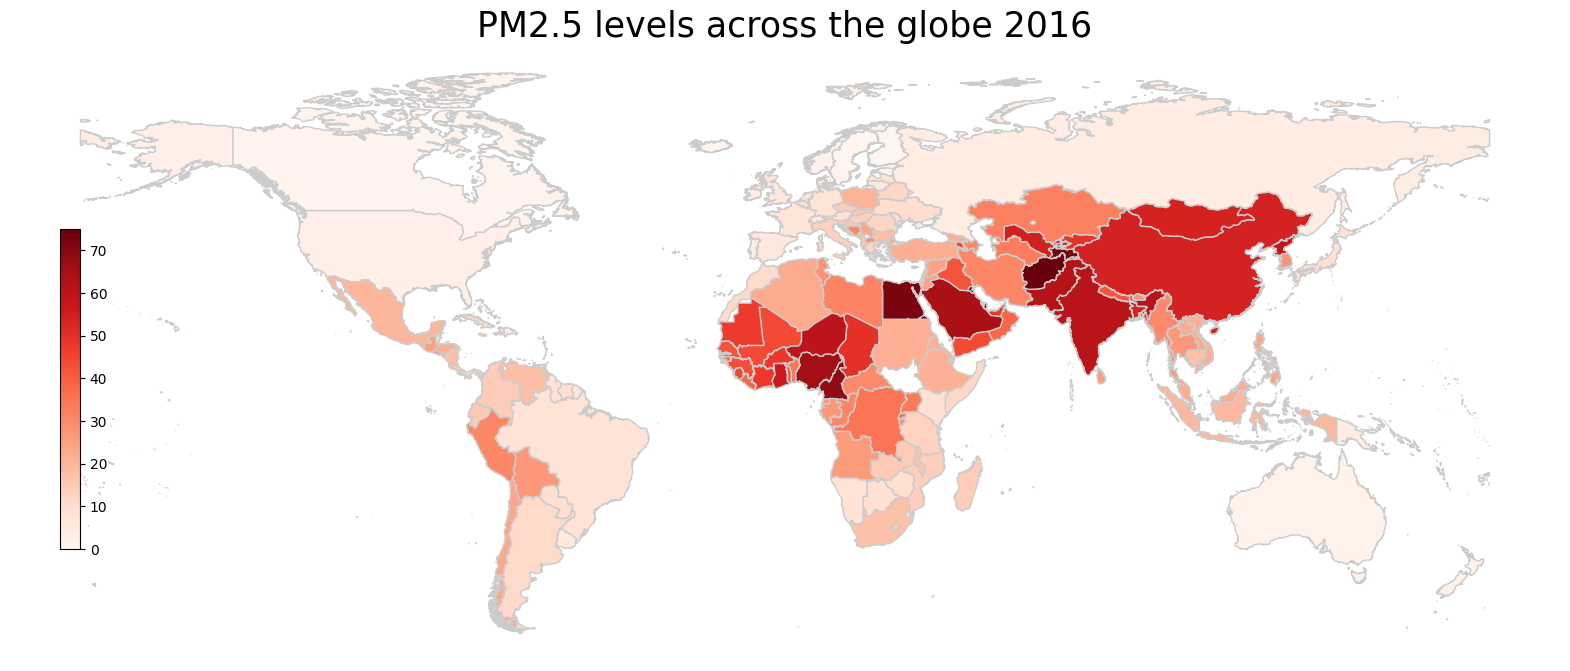

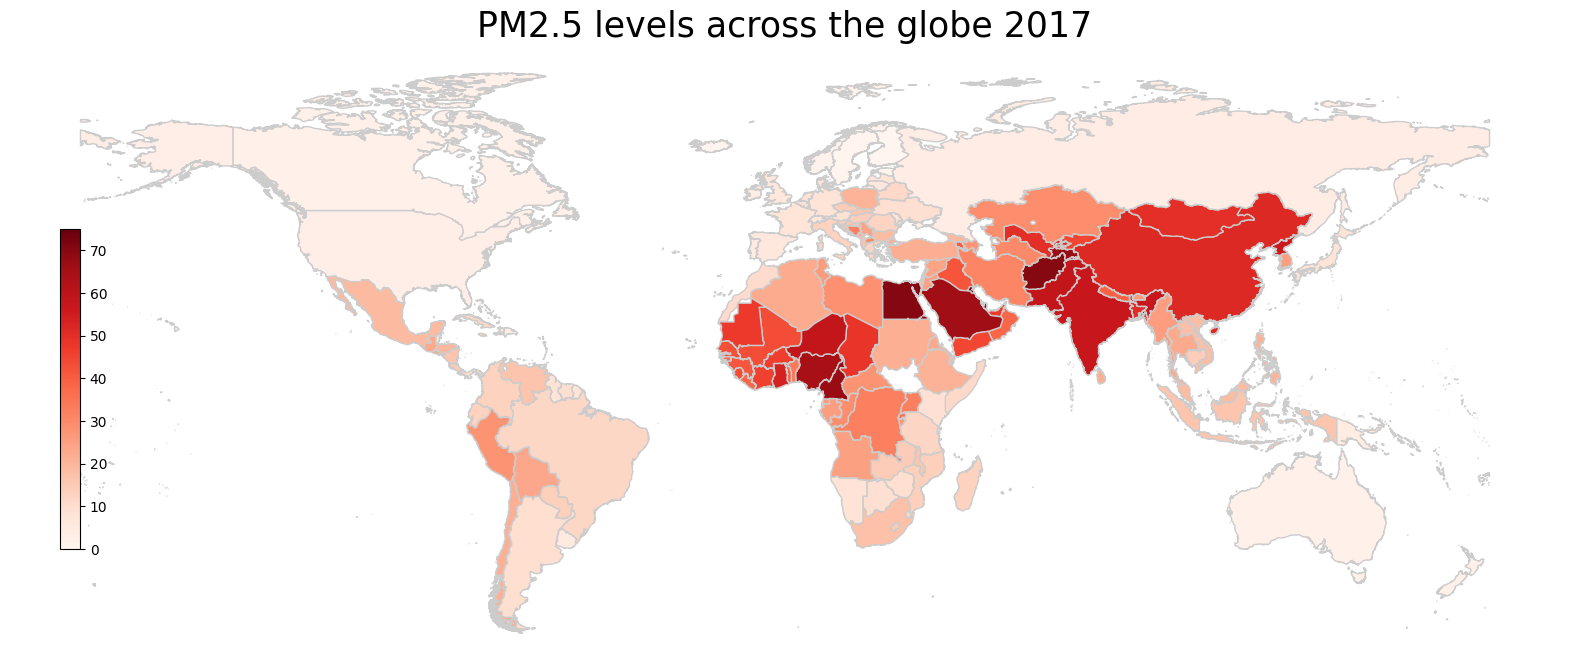

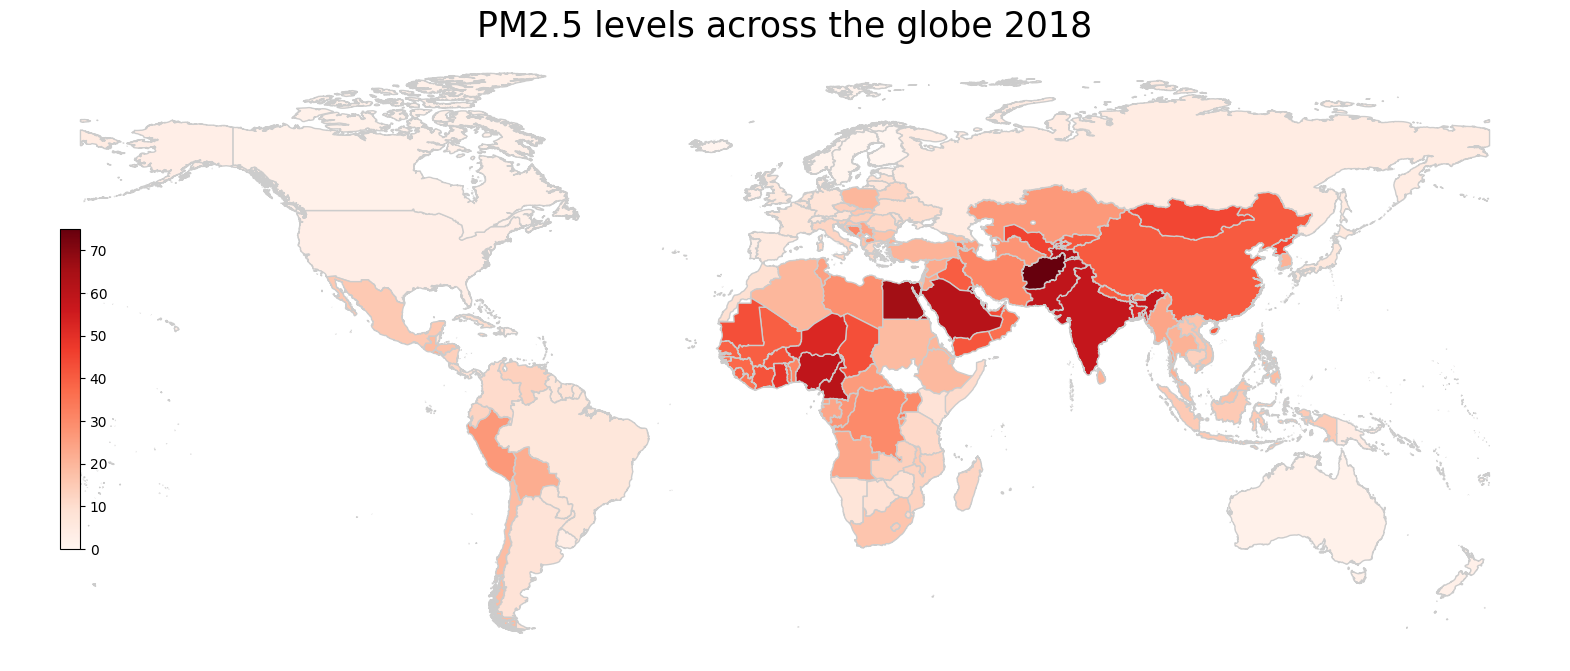

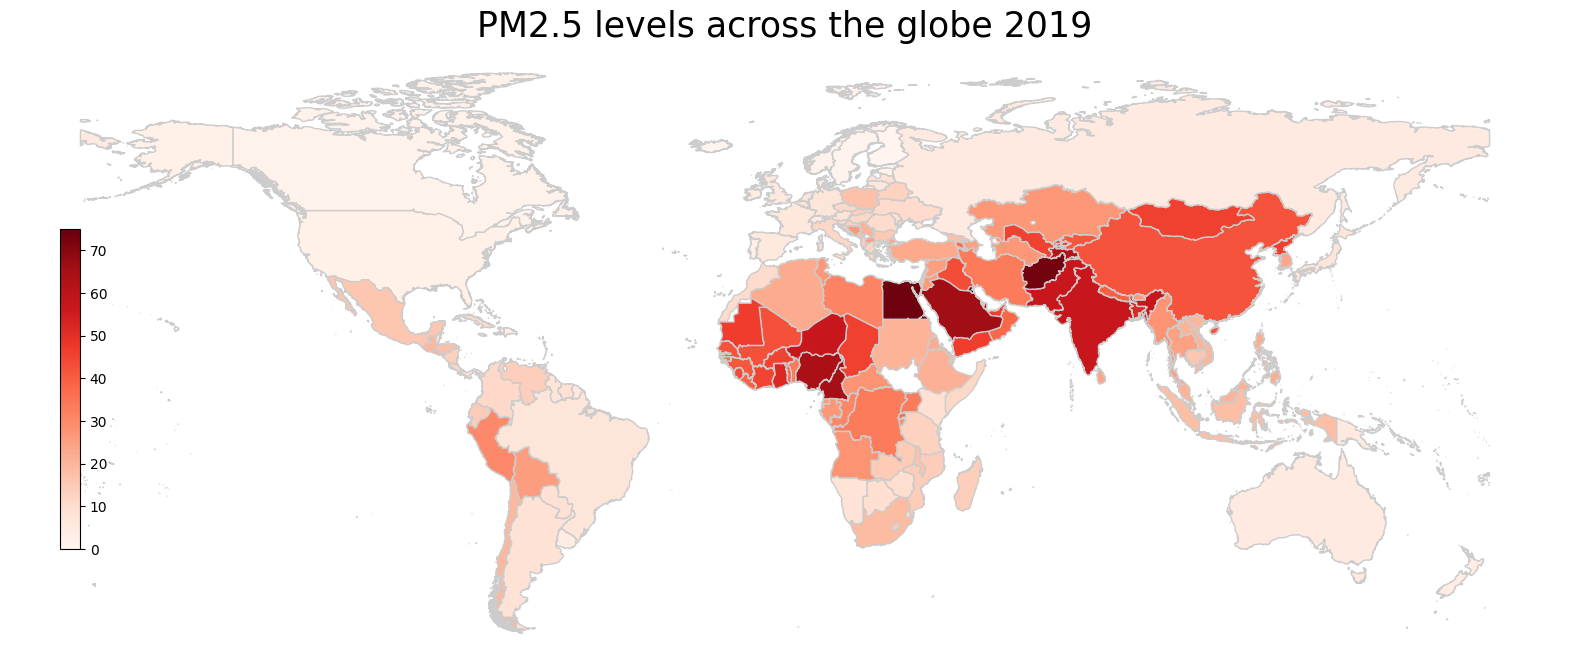

In [4]:
def year_function(specific_year):
    # Set the range for the choropleth
    title = 'PM2.5 levels across the globe ' + str(specific_year)
    col = str(specific_year) + ' Total:'
    vmin = 0
    vmax = 75
    cmap = 'Reds'
    fig, ax = plt.subplots(1, figsize=(20, 8))
    ax.axis('off')
    merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Adding the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)
year_function(2010)
year_function(2011)
year_function(2012)
year_function(2013)
year_function(2014)
year_function(2015)
year_function(2016)
year_function(2017)
year_function(2018)
year_function(2019)